In [ ]:
# gerar importance só com valores classificaveis
# comparar de cada árvore as 10 mais importan

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import nbimporter
from sklearn.metrics import silhouette_samples, silhouette_score
from pandas.plotting import parallel_coordinates

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from preprocessamento import *

Importing Jupyter notebook from preprocessamento.ipynb


In [3]:
target = gerar_target(data_2016)

In [2]:
data_2016 = pd.read_csv('respostas_2016.csv')

In [4]:
dados_2016 = preprocessar_apenas_colunas(data_2016,['situacao', 'competencias_area_ti', 'afinidade_natureza', 'dedicacao_exigida','afinidade_matematica', 'tipo_escola_ensino_medio', 'condicoes_mercado_trabalho', 'afinidade_linguagens','realizacao_profissional', 'distancia_ufc_casa', 'disciplinas_ofertadas'])

In [5]:
#enumerando as colunas
cont = 0
for item in dados_2016.columns:
    print(item + " - " + str(cont))
    cont += 1

situacao - 0
distancia_ufc_casa - 1
tipo_escola_ensino_medio - 2
afinidade_linguagens - 3
afinidade_matematica - 4
afinidade_natureza - 5
dedicacao_exigida - 6
disciplinas_ofertadas - 7
condicoes_mercado_trabalho - 8
competencias_area_ti - 9
realizacao_profissional - 10


In [24]:
#rodando o kmeans para k=2 até k=10

In [6]:
#com k=2
modelo1 = KMeans(n_clusters=2).fit(dados_2016)
#modelo1.cluster_centers_

In [8]:
#com k=3
modelo2 = KMeans(n_clusters=3).fit(dados_2016)
#modelo2.cluster_centers_

In [27]:
modelo2.cluster_centers_

array([[ 0.1372549 ,  2.74509804,  1.52941176,  1.62745098,  1.56862745,
         1.52941176,  1.56862745,  1.01960784,  1.19607843,  1.56862745,
         1.88235294],
       [ 0.0661157 ,  0.19834711,  1.04132231,  1.81818182,  2.25619835,
         1.83471074,  2.19834711,  1.8677686 ,  1.94214876,  2.27272727,
         2.50413223],
       [ 0.06153846,  0.2       ,  1.4       ,  1.46153846,  1.        ,
         1.10769231,  1.41538462,  1.07692308,  1.13846154,  1.53846154,
         1.83076923]])

distancia_ufc_casa - 0
        new_df['distancia_ufc_casa'] = pd.Series([0 if s == 'Até 10 km' else 1 if s == 'Entre 10 km e 25 km' else 2 if s == 'Entre 25 km e 50 km' else 3 if s == 'Entre 50 km e 100 km' else 4 if s == 'Acima de 100 km' else 5 for s in df['distancia_ufc_casa']])

tipo_escola_ensino_medio - 1
    new_df['tipo_escola_ensino_medio'] = pd.Series([0 if s == 'Pública - Profissionalizante na Área de Informática' else 1 if s == 'Particular' else 2 if s == 'Pública Tradicional' else 3 if s == 'Particular e pública' else 4 for s in df['tipo_escola_ensino_medio']])

afinidade_linguagens - 2
        new_df['afinidade_linguagens'] = pd.Series([0 if s == 'Pouquíssima afinidade' else 1 if s == 'Alguma afinidade' else 2 if s == 'Boa afinidade' else 3 if s == 'Muita afinidade' else 4 for s in df['afinidade_linguagens']])

afinidade_matematica - 3
afinidade_natureza - 4
dedicacao_exigida - 5
disciplinas_ofertadas - 6
condicoes_mercado_trabalho - 7
competencias_area_ti - 8
realizacao_profissional - 9

In [9]:
#com k=4
modelo3 = KMeans(n_clusters=4).fit(dados_2016)
#modelo3.cluster_centers_

In [10]:
#com k=5
modelo4 = KMeans(n_clusters=5).fit(dados_2016)
#modelo4.cluster_centers_

In [11]:
#com k=6
modelo5 = KMeans(n_clusters=6).fit(dados_2016)
#modelo5.cluster_centers_

In [12]:
#com k=7
modelo6 = KMeans(n_clusters=7).fit(dados_2016)
#modelo6.cluster_centers_

In [13]:
#com k=8
modelo7 = KMeans(n_clusters=8).fit(dados_2016)
#modelo7.cluster_centers_

In [14]:
#com k=9
modelo8 = KMeans(n_clusters=9).fit(dados_2016)
#modelo8.cluster_centers_

In [15]:
#com k=10
modelo9 = KMeans(n_clusters=10).fit(dados_2016)
#modelo10.cluster_centers_

For n_clusters = 2 The average silhouette_score is : 0.202166897963


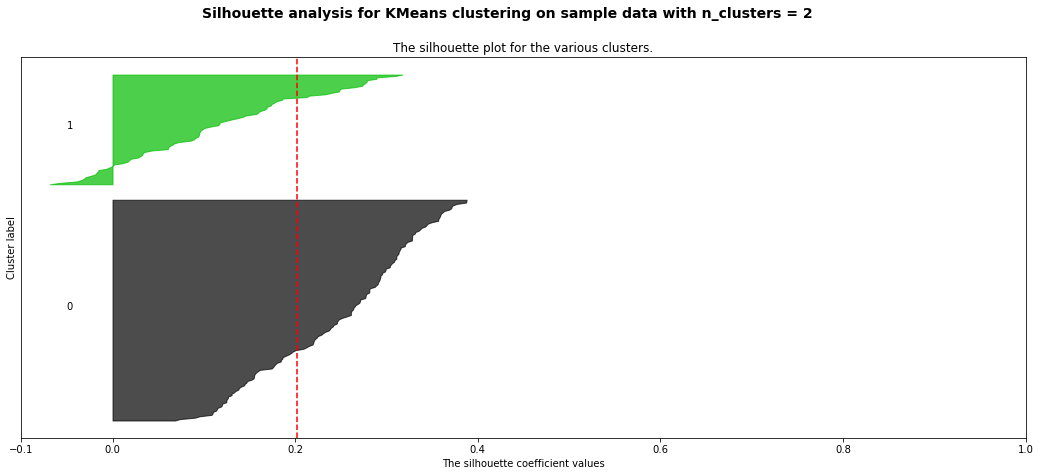

For n_clusters = 3 The average silhouette_score is : 0.158490402383


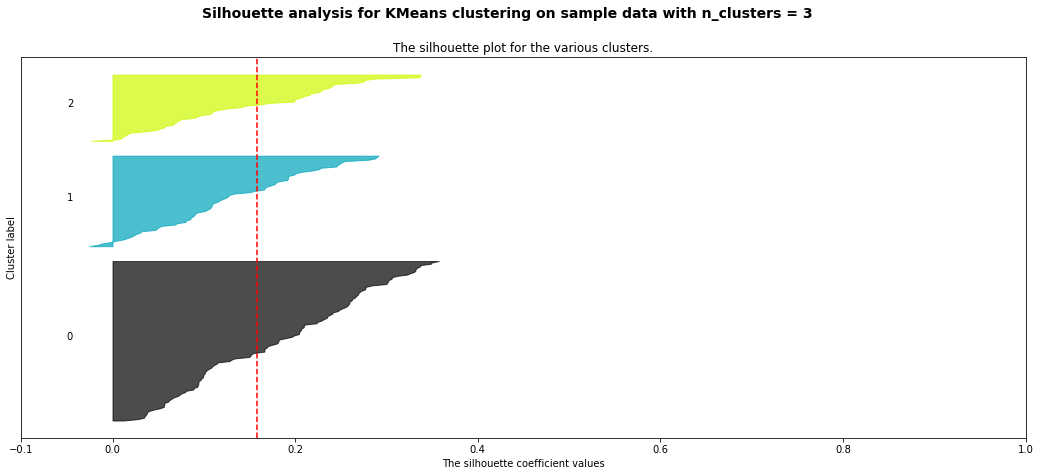

For n_clusters = 4 The average silhouette_score is : 0.130585077397


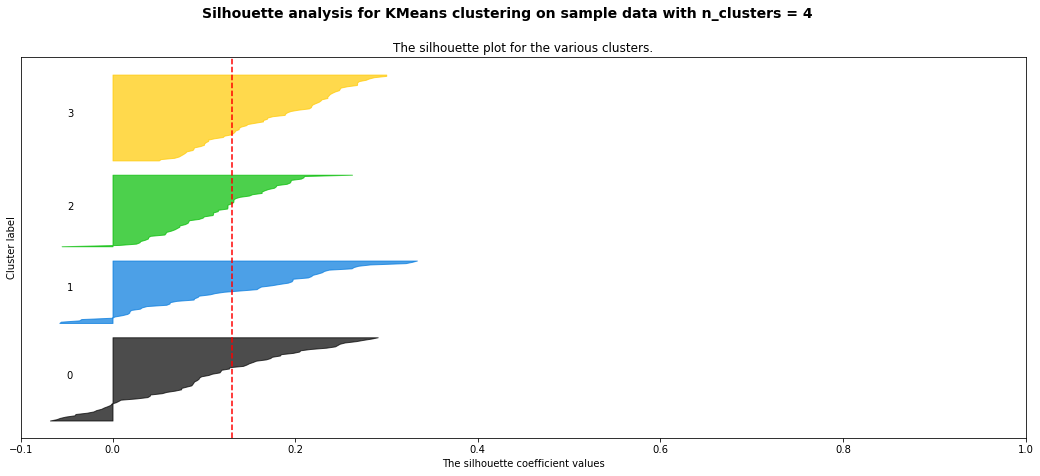

For n_clusters = 5 The average silhouette_score is : 0.128459846421


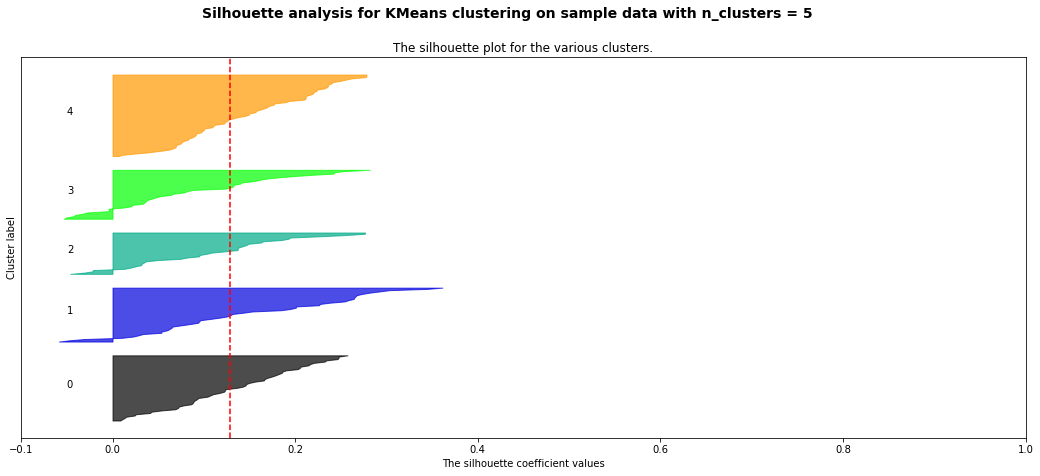

For n_clusters = 6 The average silhouette_score is : 0.130757311642


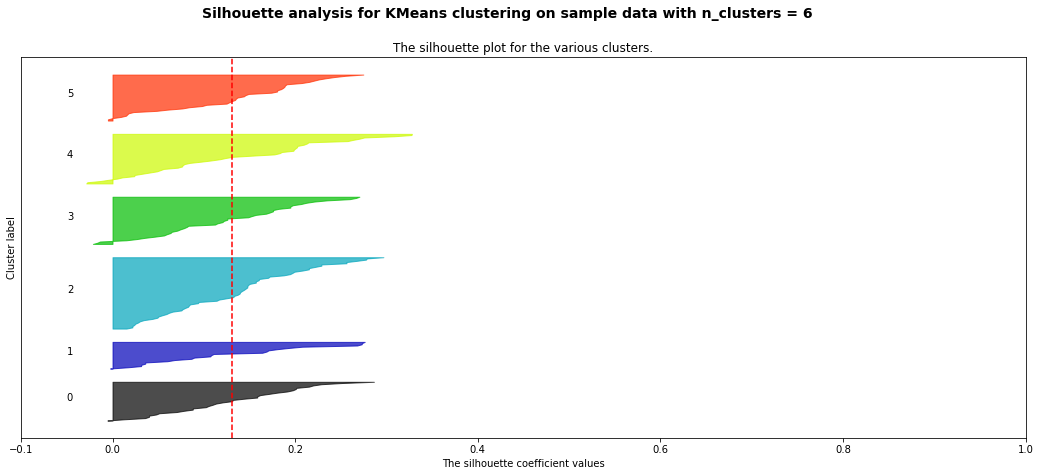

For n_clusters = 7 The average silhouette_score is : 0.117868600431


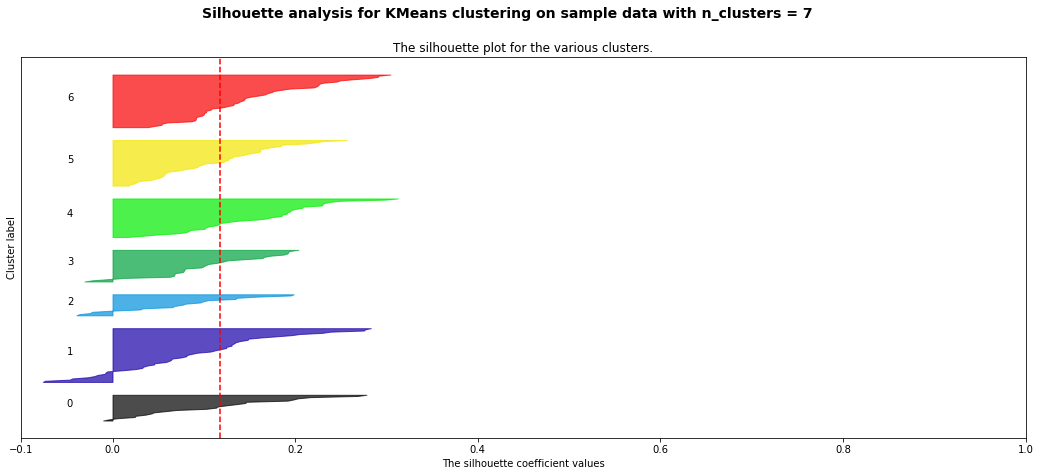

For n_clusters = 8 The average silhouette_score is : 0.119824026149


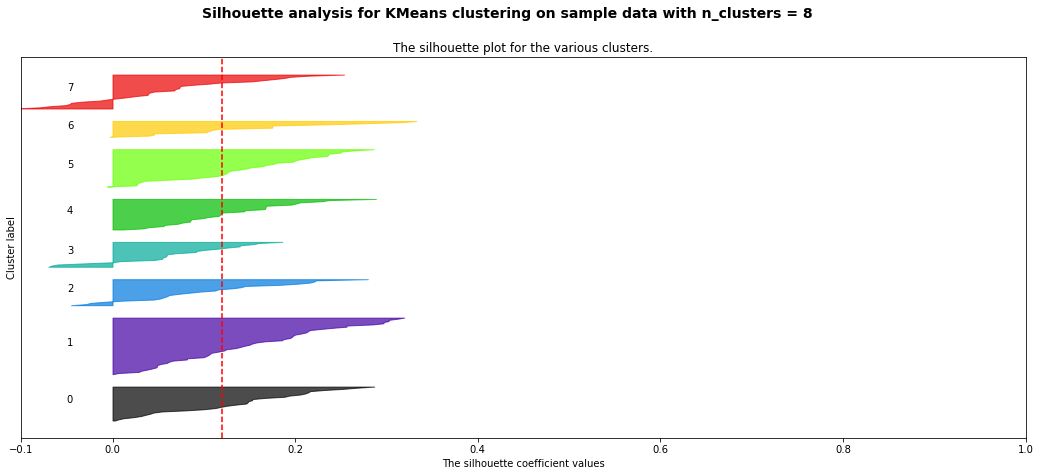

For n_clusters = 9 The average silhouette_score is : 0.118084910167


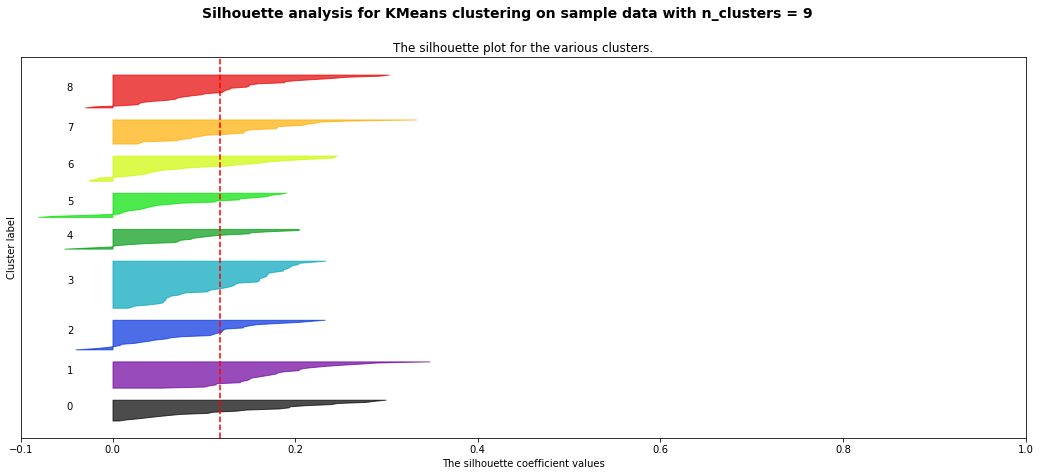

For n_clusters = 10 The average silhouette_score is : 0.115356393784


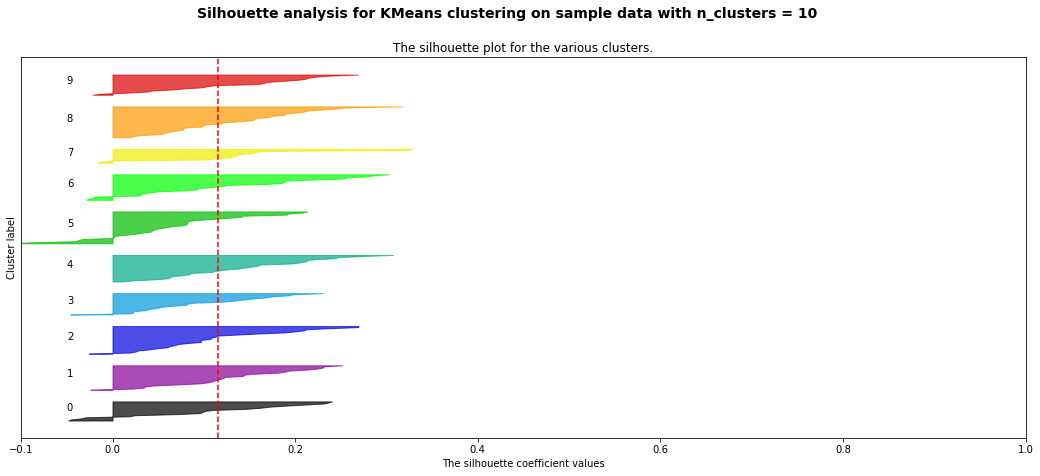

In [16]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # cria um plot
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(18, 7)
    
    # define até onde o gráfico vai
    ax1.set_xlim([-0.1, 1])
    
    # inicializa o cluster com k = n_clusters
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(dados_2016)
    
    # O silhouette_score nos dá um valor média para todos os clusteres
    silhouette_avg = silhouette_score(dados_2016, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # calcula os valores de cada objetivo
    sample_silhouette_values = silhouette_samples(dados_2016, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # junta os silhouette scores para todos os elementos dentro do cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()    

In [35]:
dados2016

,Sexo,situacao,distancia_ufc_casa,tipo_escola_ensino_medio,afinidade_linguagens,afinidade_matematica,afinidade_natureza,dedicacao_exigida,disciplinas_ofertadas,condicoes_mercado_trabalho,competencias_area_ti,realizacao_profissional
0,1,1,0,0,2,3,3,2,3,1,3,3
1,1,1,0,0,1,1,1,1,1,2,1,2
2,1,1,0,0,1,2,3,2,2,2,2,3
3,0,1,0,1,1,3,0,1,2,1,2,3
4,0,1,0,2,3,3,2,2,3,1,2,3
5,1,1,1,1,1,2,3,1,2,1,2,2
6,1,1,0,2,2,2,2,2,1,2,2,2
7,1,1,0,2,0,1,2,2,2,2,2,2
8,1,1,0,1,2,3,3,3,1,0,3,3
9,1,1,0,2,1,2,2,2,2,2,3,3


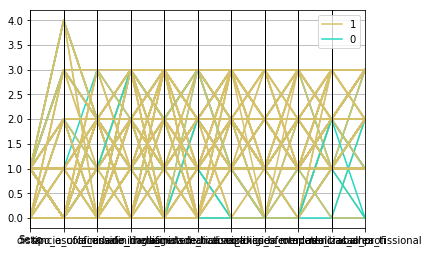

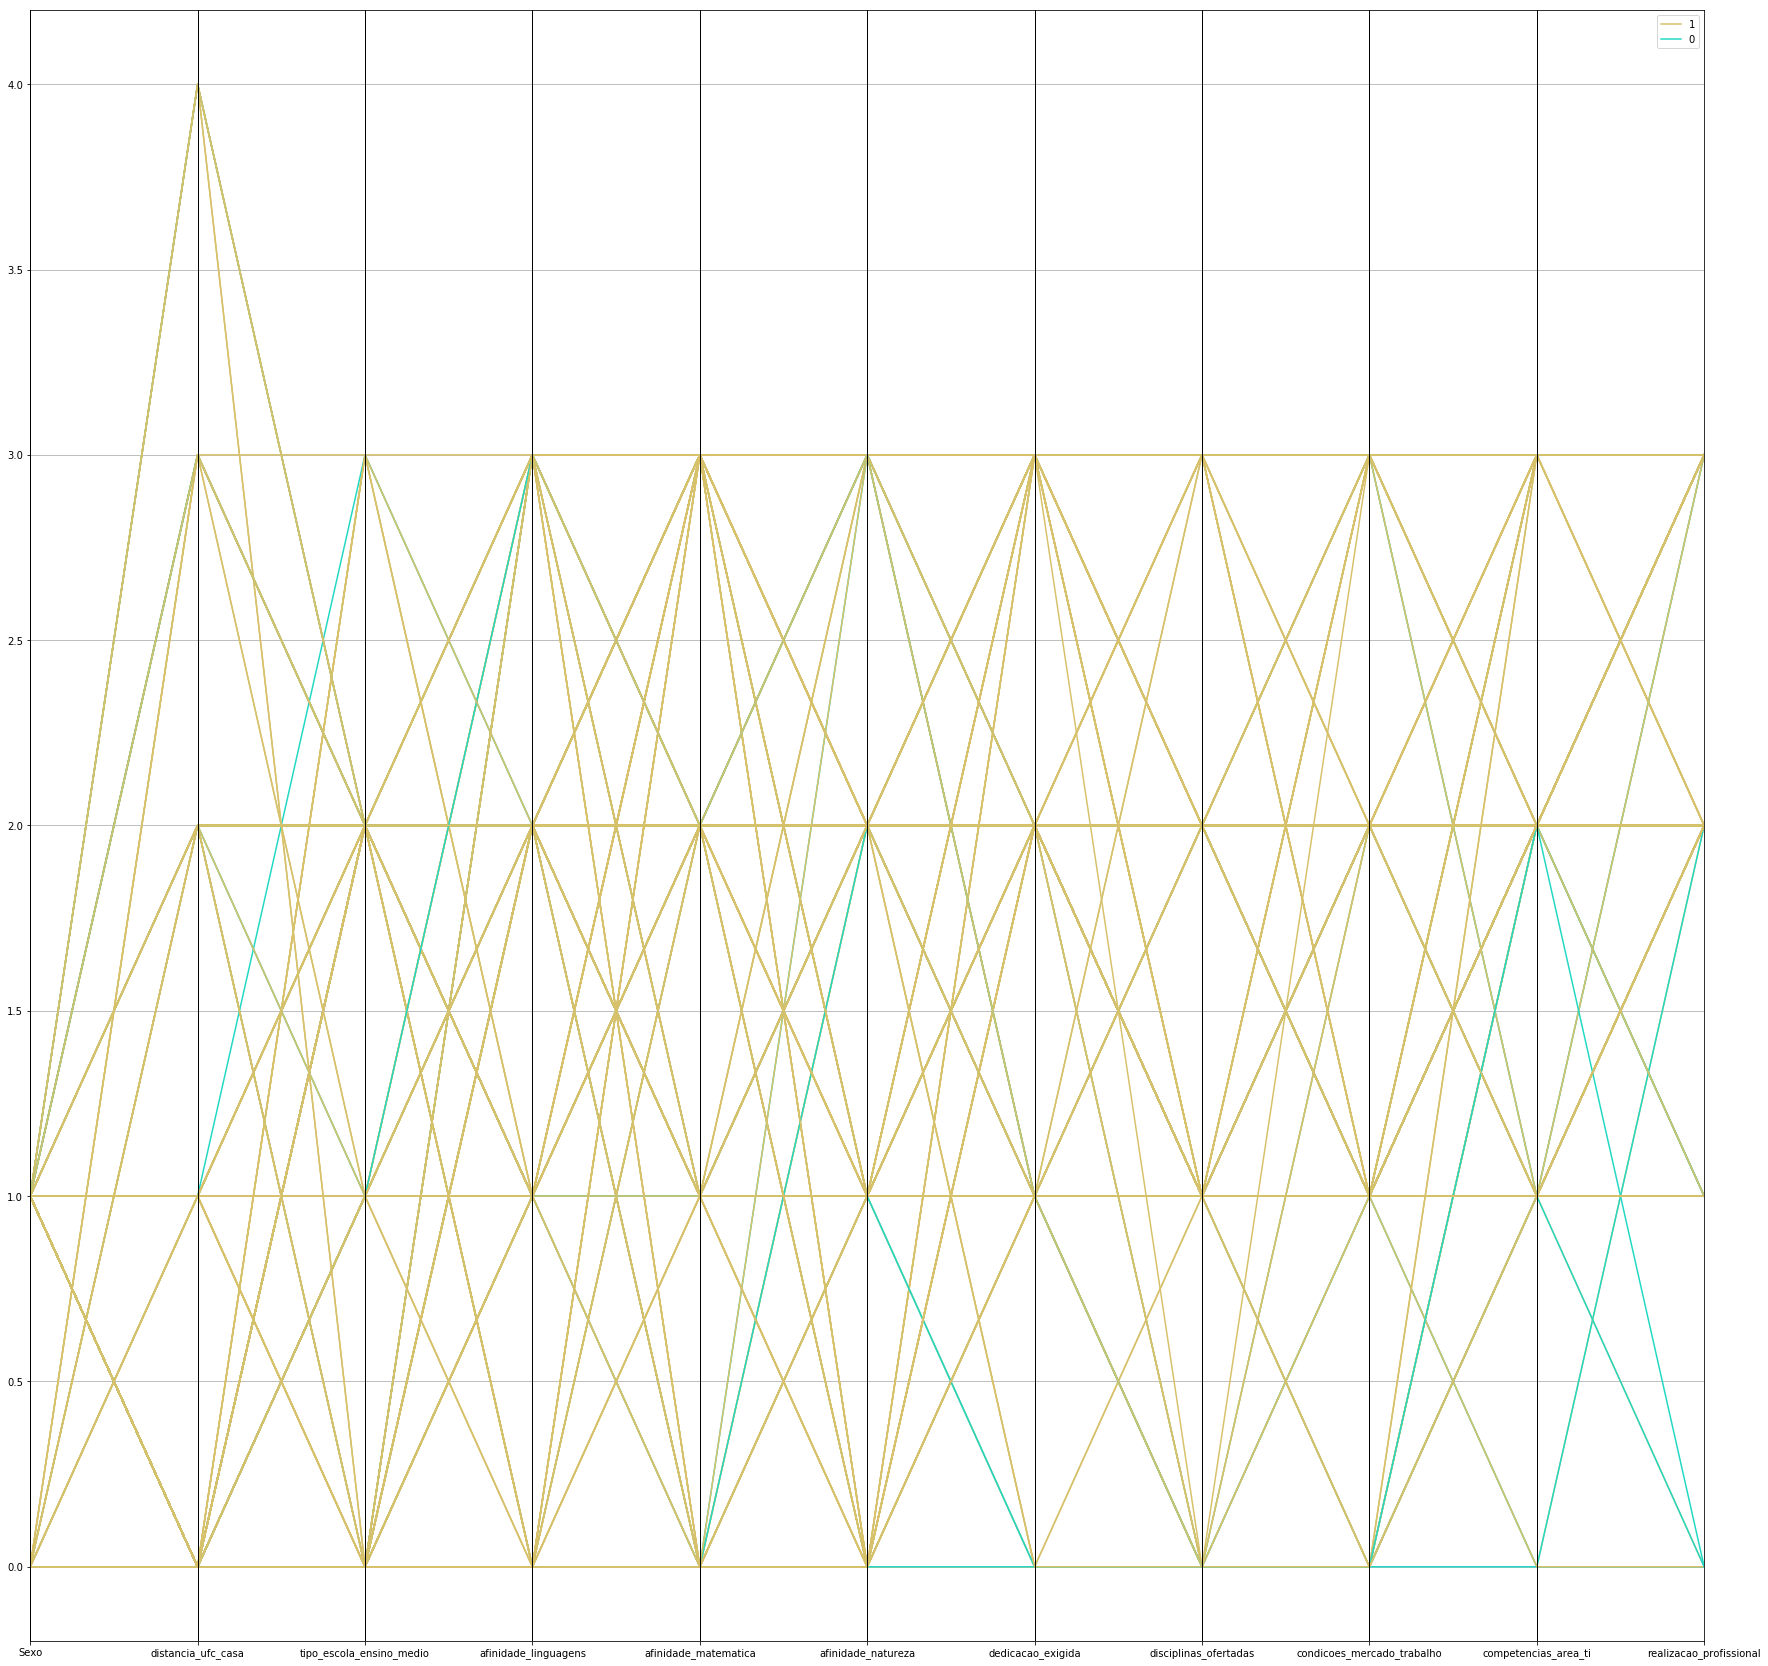

In [52]:
plt.figure
parallel_coordinates(dados2016, 'situacao')
plt.figure(figsize=(20,20))
plt.show()